# Coronary Heart Disease Prediction (CHD)
#### Submitted By :- 
- Manan Nag
- A2305221502
- 6CSE6Y

In [1]:
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing the dataset

In [3]:
df = pd.read_csv("data_CHD_risk.csv")

Describe tells us some impoertant stats about the data and shows that the data is imbalanced and we need to balance the values among the classes

# Analyzing the Dataset

In [7]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


--> The study's participants have an average age of 49 years, with the youngest participant being 32 years old and the oldest reaching 70 years.

--> Among the participants who smoke, the highest recorded number of cigarettes smoked is a remarkable 70.

--> The mean BMI (Body Mass Index) is 25. It's worth noting that BMI levels above 25 but below 30 are typically categorized as overweight, while individuals with BMI values exceeding 30 are considered obese.

--> The average glucose level is 81, which falls within the range of normal glucose levels, indicating a healthy distribution of glucose measurements among the study participants.

In [5]:
df.sample(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1234,1234,52,4.0,F,YES,20.0,0.0,0,0,0,NaN,110.0,70.0,22.52,75.0,NaN,0
2648,2648,39,2.0,M,YES,NaN,0.0,0,0,0,285.0,121.0,82.0,27.62,85.0,65.0,0
1101,1101,54,2.0,M,YES,20.0,0.0,0,0,0,261.0,117.0,74.0,20.88,80.0,77.0,1
3310,3310,65,4.0,F,YES,1.0,0.0,0,1,0,322.0,165.0,95.0,22.84,80.0,81.0,0
2833,2833,55,1.0,M,YES,20.0,0.0,0,1,0,220.0,180.0,108.0,23.59,82.0,90.0,0


In [6]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

- This info tells us that there is some missing data in our data set which needs to be delt with 

## Data preprocessing

In [8]:
missing_data=df.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
The total percentage of missing data is 15.04%


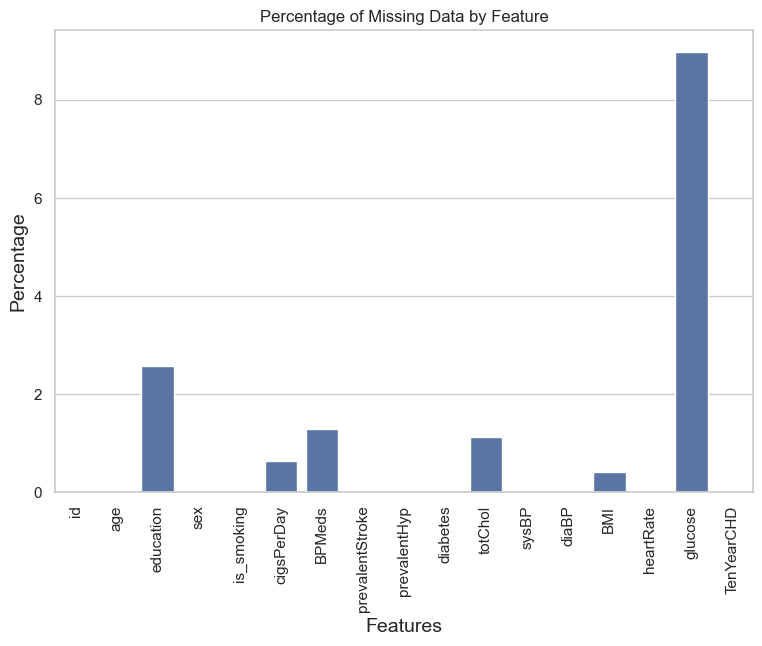

In [9]:
# Calculate the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [10]:
# Drop missing values
df.dropna(axis=0,inplace=True)

In [11]:
df.shape

(2927, 17)

In [12]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


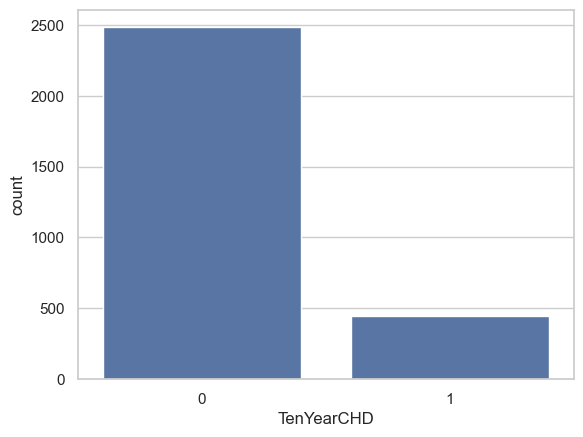

There are 2483 patients without heart disease and 444 patients with heart disease


In [13]:
sns.countplot(x="TenYearCHD",data=df)
plt.show()
cases=df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease")

The ratio of individuals without the disease to those with the disease is approximately 1:5.59, indicating a significant class imbalance. This imbalance should be considered when developing and evaluating predictive models, as it may impact the model's performance and interpretation.


In [14]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
categorical_features=['sex','education','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [16]:
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

sex :
sex
F    1620
M    1307
Name: count, dtype: int64
------------------
education :
education
1.0    1240
2.0     874
3.0     487
4.0     326
Name: count, dtype: int64
------------------
is_smoking :
is_smoking
NO     1480
YES    1447
Name: count, dtype: int64
------------------
BPMeds :
BPMeds
0.0    2839
1.0      88
Name: count, dtype: int64
------------------
prevalentStroke :
prevalentStroke
0    2909
1      18
Name: count, dtype: int64
------------------
prevalentHyp :
prevalentHyp
0    2007
1     920
Name: count, dtype: int64
------------------
diabetes :
diabetes
0    2848
1      79
Name: count, dtype: int64
------------------


In [17]:
# Now for the continuous variables
numeric_features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

# Univaariant data analysis

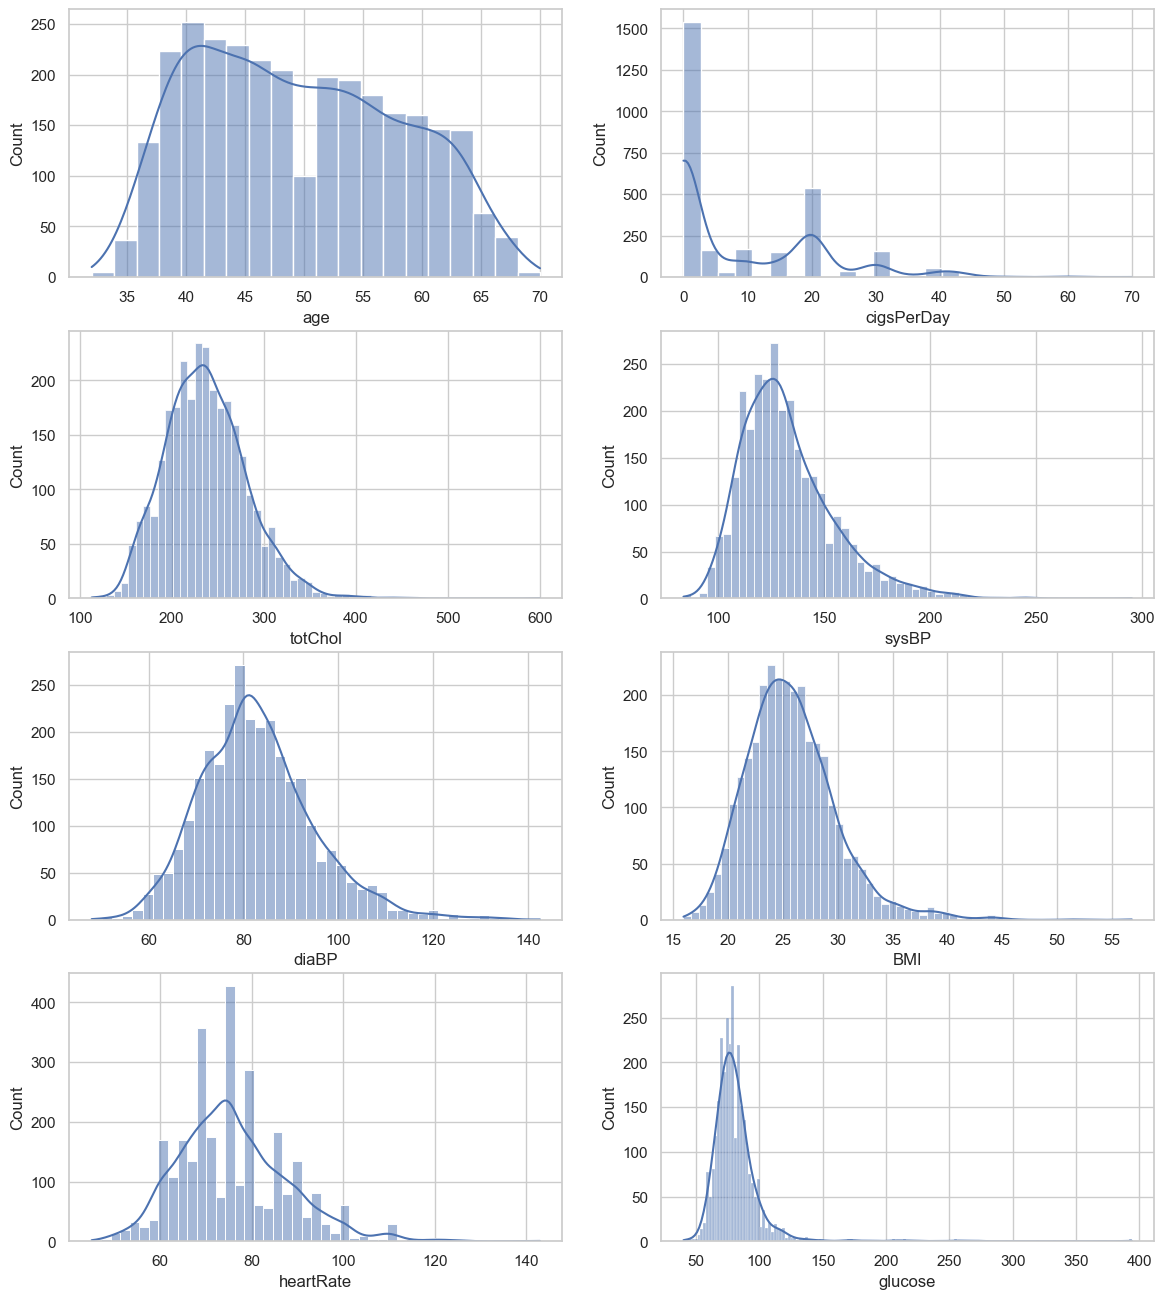

In [18]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in numeric_features:
    sns.histplot(df[col], ax=axes[index1][index2], kde=True);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show()

The variable 'Cigarettes Per Day (CigsPerDay)' exhibits a highly uneven distribution.

Similarly, 'Heart Rate' (heartRate) also displays an uneven distribution.

In contrast, 'Glucose' (glucose), 'BMI' (Body Mass Index), 'Diastolic Blood Pressure (diaBP)', 'Systolic Blood Pressure (sysBP)', and 'Total Cholesterol (totChol)' demonstrate more even distributions.

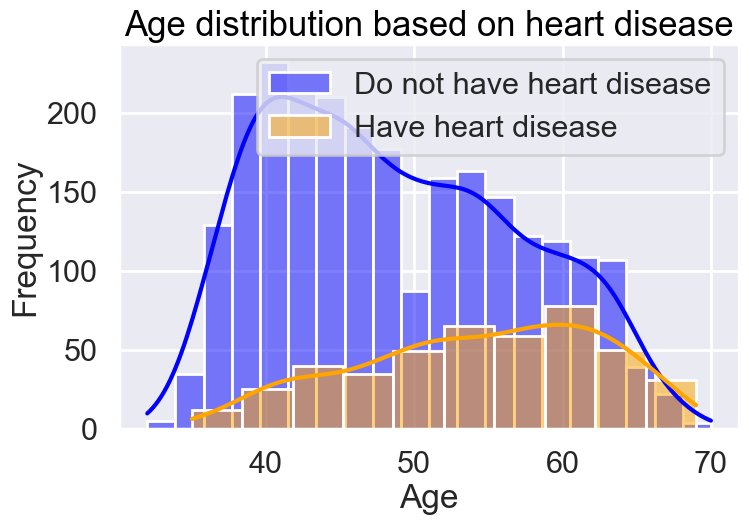

In [19]:
sns.set_theme('poster')
plt.figure(figsize=(8,5))
plt.title('Age distribution based on heart disease', color="Black", fontsize=25)

sns.histplot(df[df['TenYearCHD'] == 0]['age'], kde=True, label='Do not have heart disease', color='blue')
sns.histplot(df[df['TenYearCHD'] == 1]['age'], kde=True, label='Have heart disease', color='orange')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

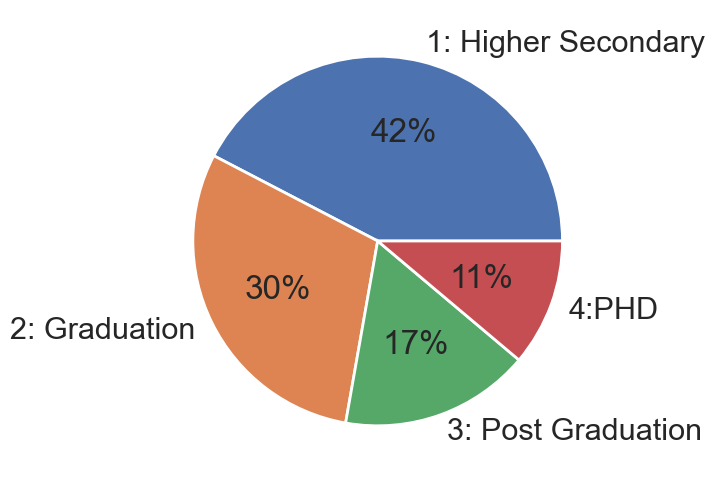

In [20]:
# list for the chest pain type column
chest_pain = [ '1: Higher Secondary', '2: Graduation',
              '3: Post Graduation','4:PHD']

# make an object which store value count of the elements in chest pain type column
cp_data = pd.Series(df['education']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,6))

# ploting pie chart
plt.pie(cp_data,labels=chest_pain,autopct='%.0f%%')
plt.show()

<Axes: xlabel='is_smoking', ylabel='count'>

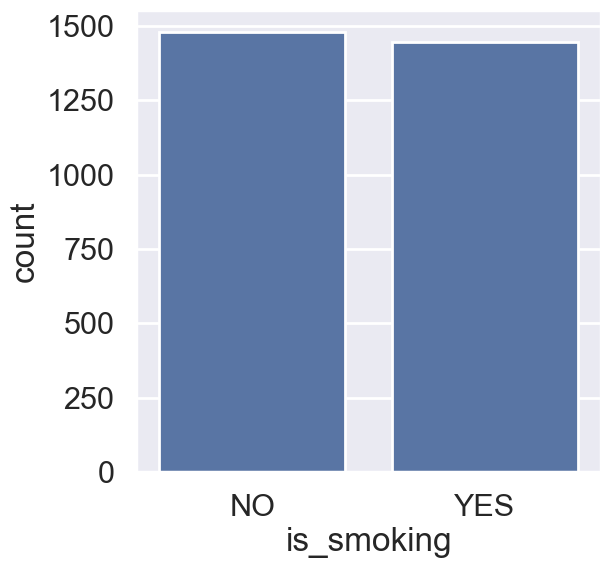

In [21]:
# count plot for is_smoking column
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='is_smoking')

In [22]:
df["TenYearCHD"].value_counts(normalize=True)

TenYearCHD
0    0.848309
1    0.151691
Name: proportion, dtype: float64

15% of the data indicative for positive disease in the near future

# Encoding Technique

In [23]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [24]:
df['is_smoking']=df["is_smoking"].map({"YES":1,"NO":0})
df['sex']=df["sex"].map({"M":1,"F":0})

In [25]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [27]:
df=df.drop(["id"],axis=1)
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Feature Selection using Chi Square (Category)

It's important to note that the chi-square test is suitable for nominal data, which consists of categories with no inherent order. However, if you are working with ordinal data, where categories have a meaningful order, it may be more appropriate to explore other statistical tests such as the Mann-Whitney U test or the Kruskal-Wallis test for our analysis.

In [28]:
categorical_features=df[['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']]
categorical_features

,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes
1,1,0,0.0,0,1,0
2,0,1,0.0,0,0,0
3,1,1,0.0,0,1,0
4,0,1,0.0,0,0,0
5,0,0,0.0,0,1,0
...,...,...,...,...,...,...
3384,0,0,0.0,0,1,0
3385,0,0,0.0,0,0,0
3386,0,0,0.0,0,0,0
3387,1,1,0.0,0,1,0


In [29]:
X = categorical_features
y = df['TenYearCHD']

In [30]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X, y)
chi_scores

(array([10.86106465,  1.64527101, 24.4846018 ,  7.87008359, 57.41396234,
        28.48354153]),
 array([9.82072196e-04, 1.99603796e-01, 7.49060905e-07, 5.02593299e-03,
        3.53091810e-14, 9.44983806e-08]))

<Axes: >

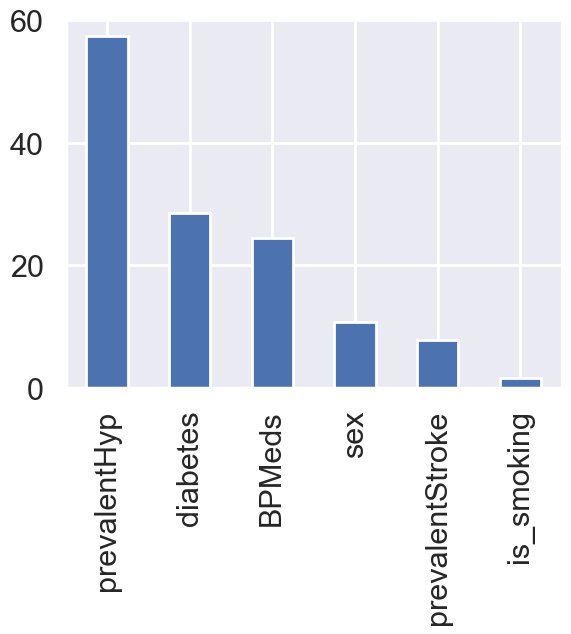

In [31]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

A high chi value means that there is a significant statistical relationship between the feature and the target variable.
Therefore we can include these features in out model.

<Axes: >

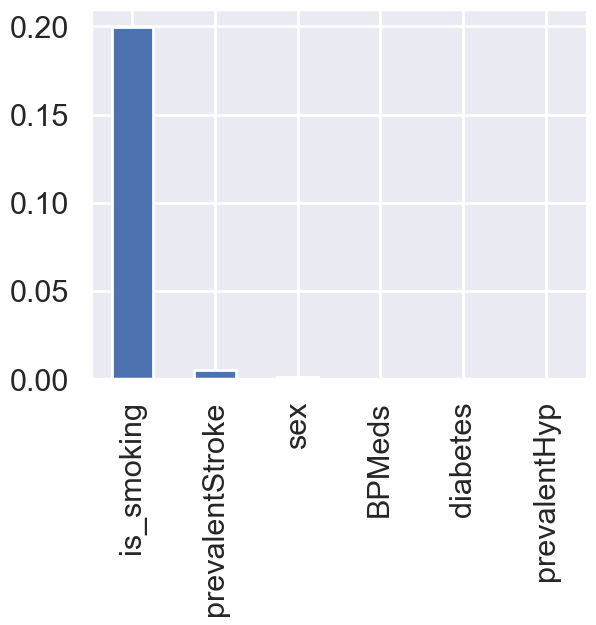

In [32]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

- In chi-squared feature selection, a lower p-value indicates that there is a significant statistical relationship between the feature and the target variable.
- A low p-value suggests that the feature is not independent of the target variable and that there is strong evidence of association.
- In this dataset, the p-value for the 'is_smoking' feature is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that this feature is not statistically significant for our analysis.

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [34]:
print(model.feature_importances_)

[0.12971785 0.05374796 0.02060448 0.017013   0.05571175 0.00991958
 0.00543559 0.02350418 0.00987968 0.11083202 0.12261005 0.11385621
 0.11282543 0.10105582 0.11328641]


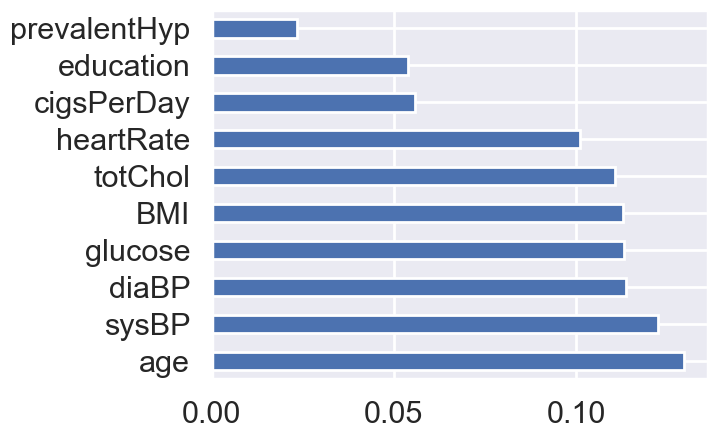

In [35]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
#Creating a dataset with only the features selected
data_features = df.drop(['is_smoking'], axis=1)
data_features.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [37]:
import statsmodels.api as sm

In [38]:
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [39]:
res =sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.396029
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2927
Model:                          Logit   Df Residuals:                     2913
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                 0.06955
Time:                        18:39:15   Log-Likelihood:                -1159.2
converged:                       True   LL-Null:                       -1245.8
Covariance Type:            nonrobust   LLR p-value:                 3.948e-30
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0295      0.007      4.481      0.000       0.017       0.042
education          -0.1984      0.055     -3.635      0.000      -0.305      -0.091
sex                 0.3405      0.118      2.889      0.004       0.109       0.571
cigsPerDay          0.0171      0.005      3.633      0.000       0.008       0.026
BPMeds              0.3521      0.260      1.356      0.175      -0.157       0.861
prevalentStroke     0.8823      0.523      1.687      0.092      -0.143       1.907
prevalentHyp        0.8857      0.139      6.354      0.000       0.612       1.159
diabetes            0.6344      0.336      1.889      0.059      -0.024       1.293
totChol            -0.0002      0.001     -0.202      0.840      -0.003       0.002
sysBP               0.0128      0.004      3.037      0.002       0.005       0.021
diaBP              -0.0288      0.007     -4.264      0.000      -0.042      -0.016
BMI                -0.0484      0.014     -3.538      0.000      -0.075      -0.022
heartRate          -0.0246      0.004     -5.552      0.000      -0.033      -0.016
glucose             0.0036      0.002      1.568      0.117      -0.001       0.008
===================================================================================
"""

# Balancing the Dataset

Given that the dataset exhibits a significant class imbalance, with approximately six negative cases for every positive case, there is a risk of developing a classifier that is biased toward the negative class. Such a classifier may yield high accuracy but poor precision and recall. To mitigate this issue, we will balance the dataset using the Synthetic Minority Oversampling Technique (SMOTE). This technique involves generating synthetic samples for the minority class to achieve a more balanced distribution, which can improve the performance and fairness of our predictive model.

**SMOTE (Synthetic Minority Oversampling Technique) follows a specific procedure to address class imbalance:**

1. SMOTE begins by randomly selecting a minority class instance 'a' and identifies its 'k' nearest neighbors, which are also in the minority class.

2. A synthetic instance is then created by randomly choosing one of these 'k' nearest neighbors, denoted as 'b,' and connecting 'a' and 'b' to form a line segment within the feature space.

3. The synthetic instances are generated as a convex combination of the two chosen instances, 'a' and 'b.'

4. This process can be repeated as many times as needed to create synthetic examples for the minority class, effectively oversampling it.

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [41]:
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [42]:
X.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0
5,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0


In [43]:
y.head()

1    0
2    0
3    1
4    0
5    1
Name: TenYearCHD, dtype: int64

In [44]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [45]:
print(num_before,num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


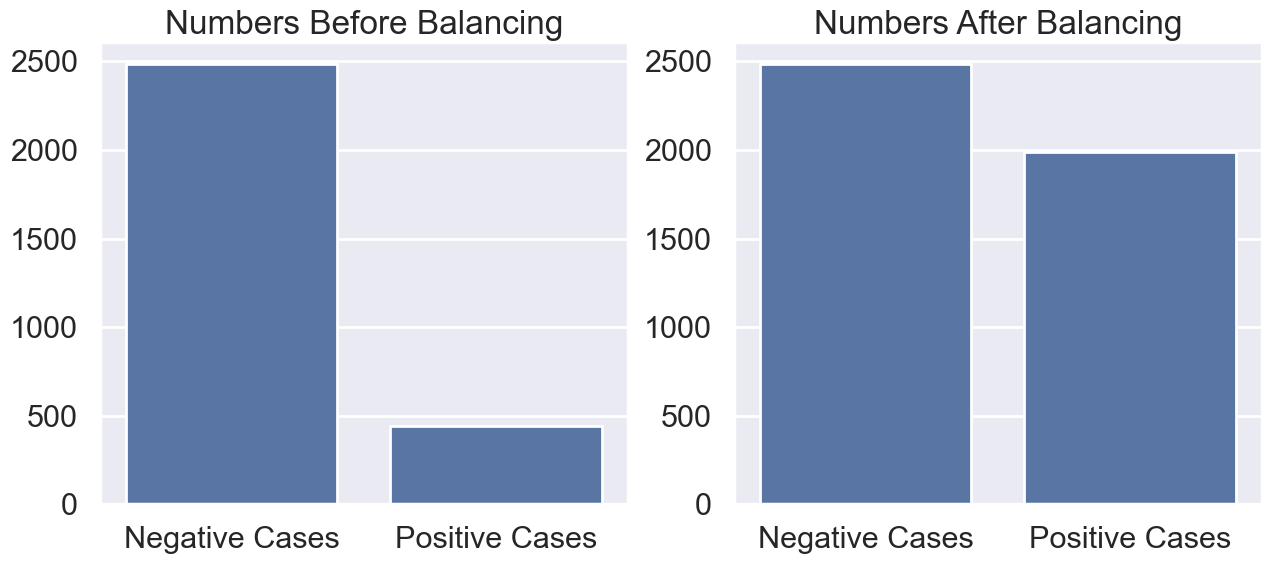

In [46]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

The dataset is more balanced now... The new ratio between negative and positive cases now stands at approximately 1:1.2, which is a significant improvement compared to the original imbalance of 1:5.57. This balancing of the dataset will help us to develop and evaluate predictive models, ensuring that both positive and negative cases are somewhat equally represented in the data

# Splitting data to Training and Testing set

In [47]:
data_features.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [48]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age','education' ,'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
859,57,1.0,1,20.0,0.0,0,1,0,262.0,131.5,92.0,28.30,70.0,78.0,0
2479,54,1.0,0,0.0,0.0,0,0,0,197.0,138.0,80.0,31.82,72.0,73.0,0
2306,38,3.0,0,5.0,0.0,0,0,0,192.0,130.0,80.0,27.51,75.0,90.0,0
575,41,4.0,1,0.0,0.0,0,0,0,197.0,134.0,87.0,25.48,75.0,75.0,0
1950,37,1.0,1,20.0,0.0,0,0,0,245.0,138.0,84.0,27.45,67.0,76.0,0


In [49]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
859,57,1.0,1,20.0,0.0,0,1,0,262.0,131.5,92.0,28.30,70.0,78.0
2479,54,1.0,0,0.0,0.0,0,0,0,197.0,138.0,80.0,31.82,72.0,73.0
2306,38,3.0,0,5.0,0.0,0,0,0,192.0,130.0,80.0,27.51,75.0,90.0
575,41,4.0,1,0.0,0.0,0,0,0,197.0,134.0,87.0,25.48,75.0,75.0
1950,37,1.0,1,20.0,0.0,0,0,0,245.0,138.0,84.0,27.45,67.0,76.0


In [50]:
y_new.head()

859     0
2479    0
2306    0
575     0
1950    0
Name: TenYearCHD, dtype: int64

In [51]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

# Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

# Model and Predictions

We are using a Support Vector Classifer (SVC)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [1]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

SyntaxError: positional argument follows keyword argument (3635906354.py, line 6)

In [56]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [57]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [58]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 85.46%


<Axes: >

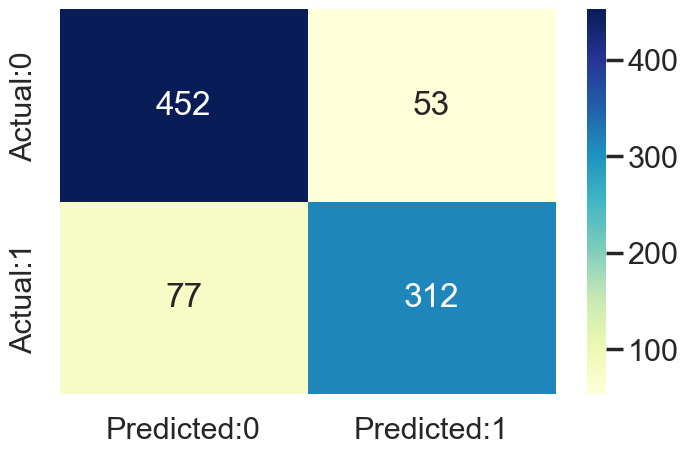

In [59]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [60]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       505
           1       0.85      0.80      0.83       389

    accuracy                           0.85       894
   macro avg       0.85      0.85      0.85       894
weighted avg       0.85      0.85      0.85       894



In [61]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 82.76%


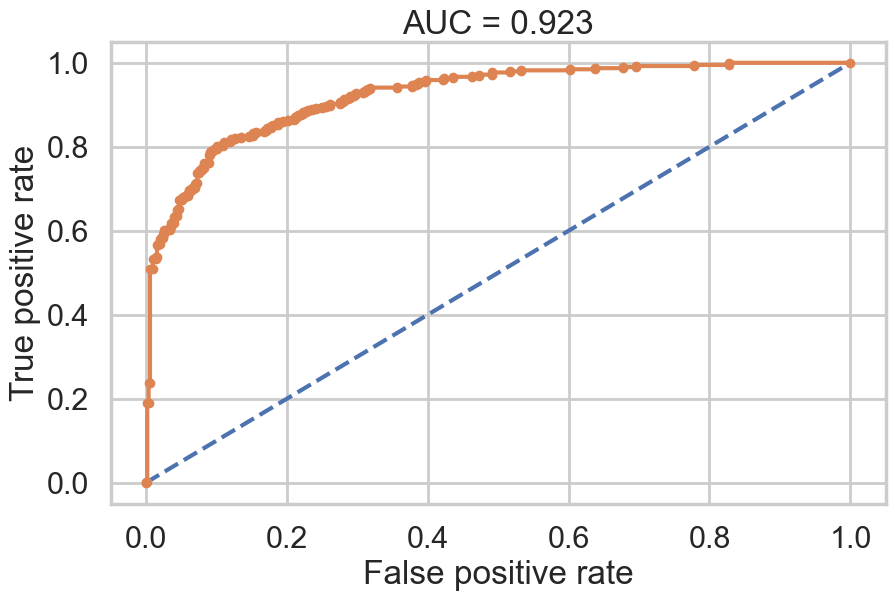

In [62]:
# ROC curve and AUC
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()